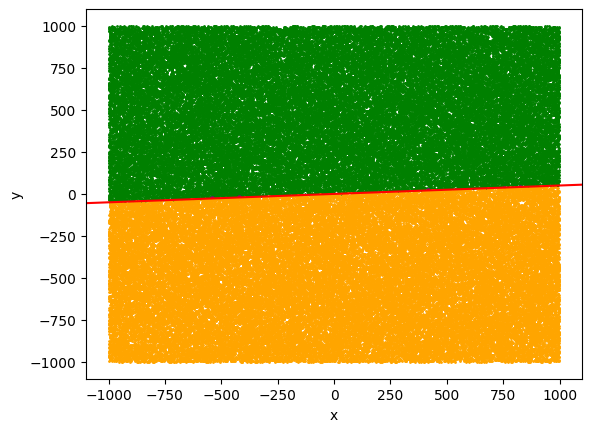

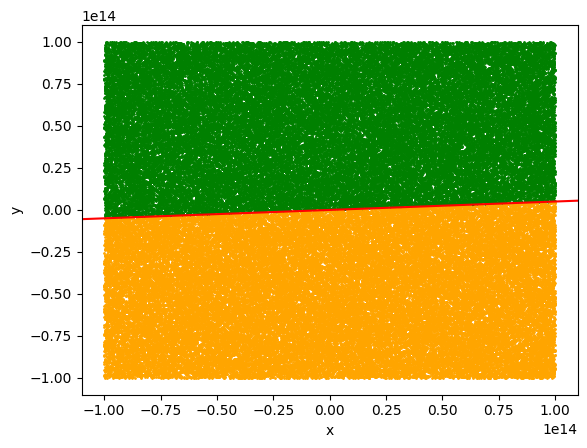

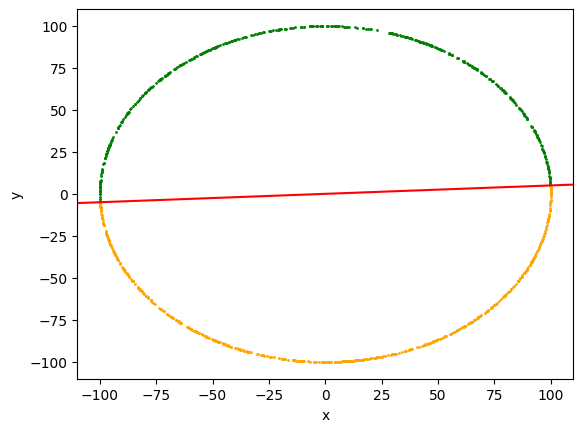

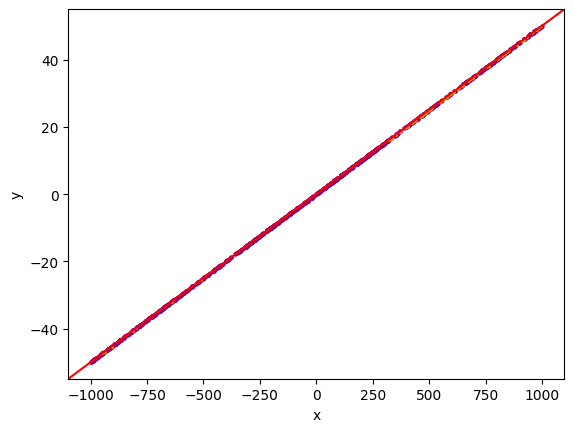

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test1 import Test
from bitalg.visualizer.main import Visualizer
import random
import math

def draw_points(points):
    vis = Visualizer()
    vis.add_point(points, s=1, color='green')
    vis.axis_equal()
    vis.show()

def draw_line(points_left, points_mid, points_right, point_a, point_b):
    vis = Visualizer()
    vis.add_line((point_a, point_b), color='red')
    vis.add_point(points_left, s=1, color=['green'])
    vis.add_point(points_mid, s=5, color=['purple'])
    vis.add_point(points_right, s=1, color=['orange'])
    vis.show()

def draw_example():
    vis = Visualizer()
    vis.add_line(((0, 2), (10, 7)))
    vis.add_point((4, 4), s=30, color='green')
    vis.add_point((6, 6), s=30, color='red')
    vis.add_point((7, 4), s=30, color='purple')
    vis.show()

def generate_uniform_points(left, right, n = 10 ** 5):
    res = []
    for _ in range(n):
        x = random.uniform(left,right)
        y = random.uniform(left,right)
        res.append((x,y))
    return res

def generate_circle_points(O, R, n = 100):
    res = []
    for _ in range(n):
        t = random.uniform(0, 2 * math.pi)
        x = R * math.cos(t) + O[0]
        y = R * math.sin(t) + O[1]
        res.append((x,y))
    return res

def generate_collinear_points(a, b, n=100):
    if a[0] == b[0] and a[1] == b[1]:
        return
    res = []
    if a[0] == b[0]:
        for _ in range(n):
            y = random.uniform(a[1], b[1])
            res.append((a[0], y))
        return res
    else:
        A = (a[1] - b[1]) / (a[0] - b[0])
        B = a[1] - A * a[0]
        for _ in range(n):
            x = random.uniform(a[0], b[0])
            y = A * x + B
            res.append((x,y))
        return res

def mat_det_3x3(a, b, c):
    return (b[0] - a[0]) * (c[1] - b[1]) - (b[1] - a[1]) * (c[0] - b[0])

def mat_det_3x3_lib(a, b, c):
    matrix = np.array([[a[0], a[1], 1], [b[0], b[1], 1], [c[0], c[1], 1]])
    det = np.linalg.det(matrix)
    return det

def mat_det_2x2(a, b, c):
    return (a[0] - c[0]) * (b[1] - c[1]) - (b[0] - c[0]) * (a[1] - c[1])

def mat_det_2x2_lib(a, b, c):
    matrix = np.array([[a[0] - c[0], a[1] - c[1]], [b[0] - c[0], b[1] - c[1]]])
    det = np.linalg.det(matrix)
    return det

def categorize_points(points, a, b, mat_det_func, eps):
    """
    :param points: tablica punktów w postaci krotek współrzednych
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param mat_det_func: funkcja która będzie tutaj używana do obliczenia wyznacznika macierzy
    :param eps: epsilon - jak blisko wyznacznik macierzy ma być blisko zera, aby uznać punkt za leżący na prostej
    :return: 3 tablice zawierające kolejno zbiory punktów: leżące na lewo od prostej, leżące na prostej, leżące na prawo od prostek
    """
    left = []
    right = []
    line = []
    for point in points:
        det = mat_det_func(a, b, point)
        if det < -eps:
            right.append(point)
        elif det > eps:
            left.append(point)
        else:
            line.append(point)
    return left, line, right

a = (-1,0)
b = (1,0.1)
# 1)
points_a = generate_uniform_points(-1000, 1000, 10 ** 5)
points_b = generate_uniform_points(-(10 ** 14), 10 ** 14, 10 ** 5)
points_c = generate_circle_points((0,0), 100, 1000)
points_d = generate_collinear_points((-1000,-49.95), (1000,50.05), 1000)

# 2)
# draw_points(points_a)
# draw_points(points_b)
# draw_points(points_c)
# draw_points(points_d)

classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3, 10 ** -1)
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right,a,b)
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3_lib, 10 ** -12)
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right,a,b)
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2, 10 ** -12)
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right,a,b)
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, 10 ** -12)
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right,a,b)



